In [225]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [226]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

Text(0.5,1,'x ~ N(0,1)')

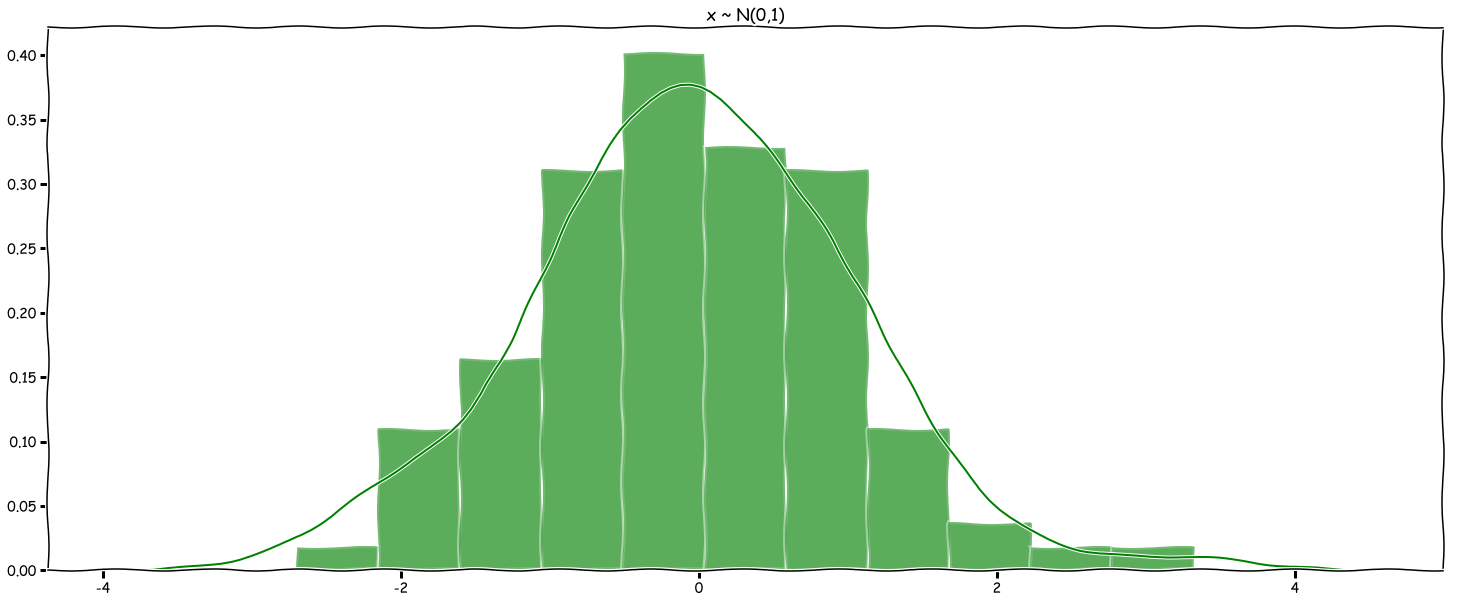

In [227]:
# 13.a. create standard normal vector
x = np.random.standard_normal(100)
plt.figure(figsize = (25, 10))
sns.distplot(x, color = 'g')
plt.title("x ~ N(0,1)")

Text(0.5,1,'eps ~ N(0,0.25)')

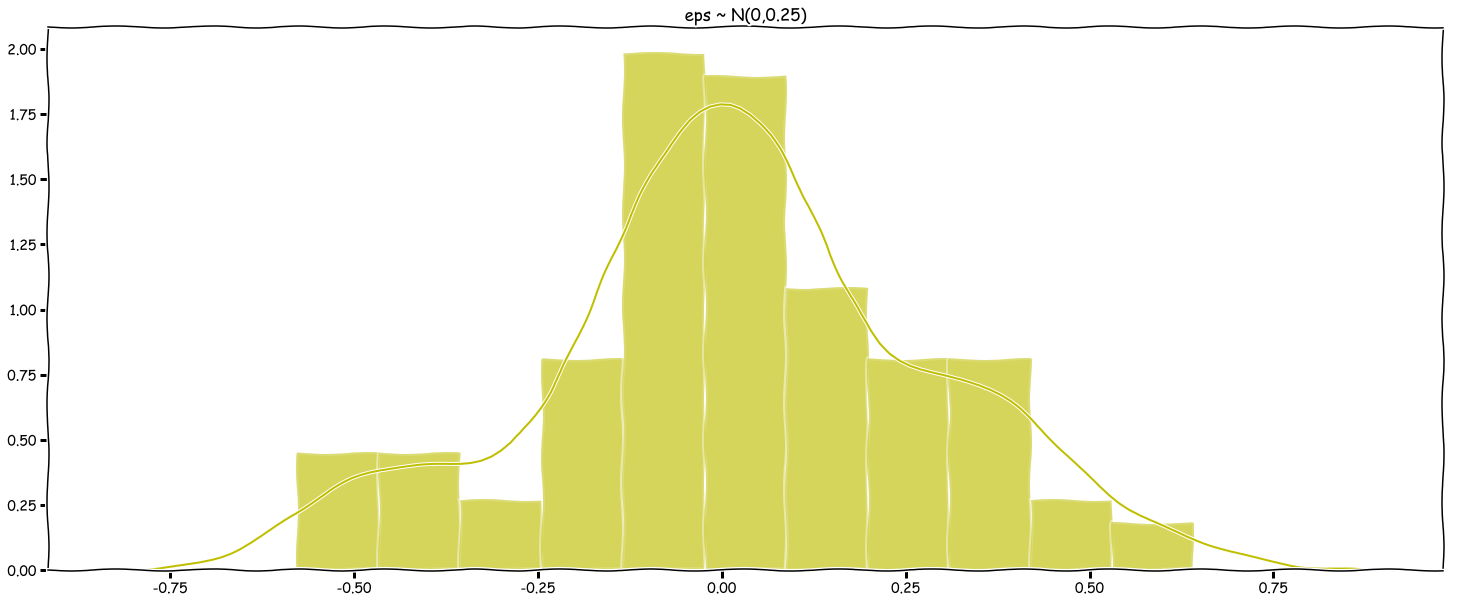

In [231]:
# 13.b. create eps ~ N(0,0.25)
eps = np.random.normal(0, 0.25, 100)
plt.figure(figsize = (25, 10))
sns.distplot(eps, color = 'y')
plt.title("eps ~ N(0,0.25)")

In [232]:
# 13.c. generate vector y = -1 + 0.5*x + eps
y = -1 + (0.5*x) + eps
print("Length of vector y: ", len(y))
print("Beta_0: ", -1.0)
print("Beta_1: ", 0.5)

Length of vector y:  100
Beta_0:  -1.0
Beta_1:  0.5


Text(0,0.5,'y')

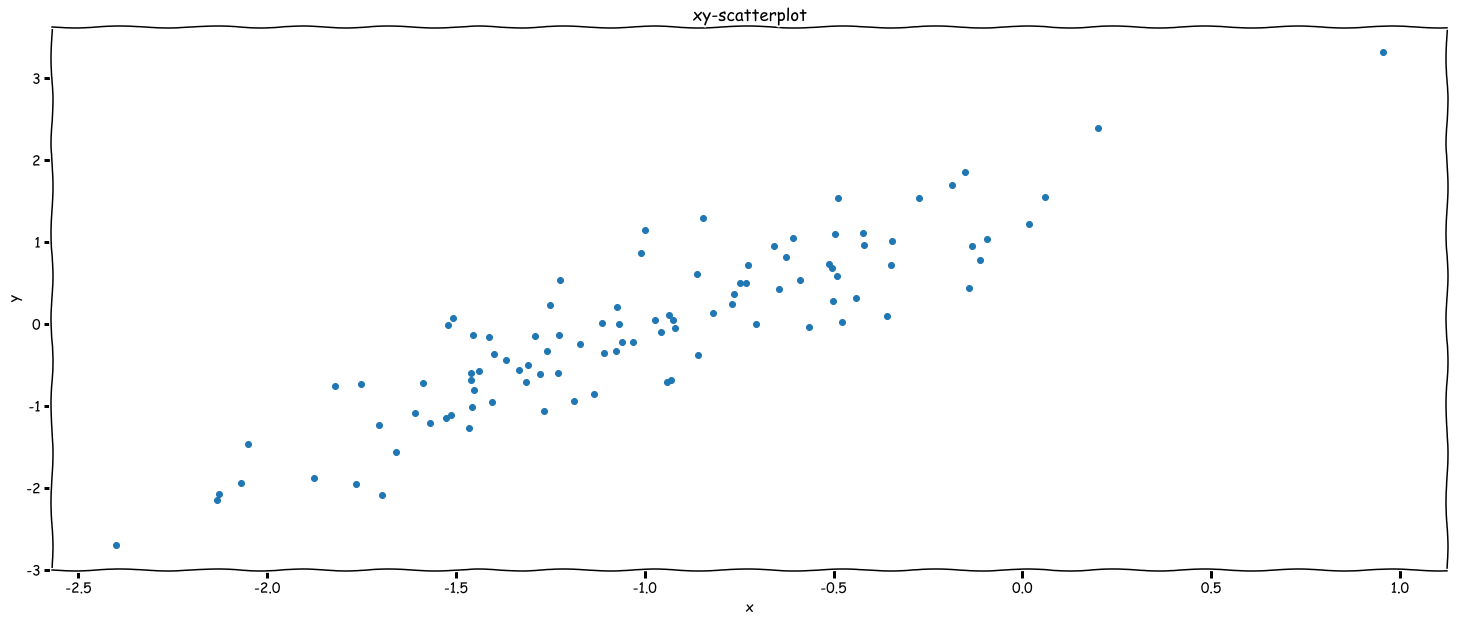

In [234]:
# 13.d. generate scatterplot
plt.figure(figsize = (25, 10))
plt.scatter(y, x)
plt.title("xy-scatterplot")
plt.xlabel("x")
plt.ylabel("y")

**Observation: linear relationship between x and y with a positive slope.**

In [241]:
# 13.e. fitting a linear model
data = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis = 1)
data.columns = ['x', 'y']
reg_1 = ols("y~x", data = data).fit()
print("y = ", f1)

y =   
0.5065 x - 0.9784


In [242]:
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     404.8
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.43e-36
Time:                        22:25:54   Log-Likelihood:                -5.8963
No. Observations:                 100   AIC:                             15.79
Df Residuals:                      98   BIC:                             21.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9784      0.026    -37.689      0.000      -1.030      -0.927
x              0.5065      0.025     20.118      0.000       0.457       0.556
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.128
Skew:                          -0.083   Prob(JB):                        0.938
Kurtosis:                       2.944   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
print("Beta_hat_0: %f" % reg_1.params[0])
print("Beta_hat_1: %f" % reg_1.params[1])

Beta_hat_0: -0.978413
Beta_hat_1: 0.506485


In [244]:
print("Difference in Beta_0: ", -1.0 - reg_1.params[0])
print("Difference in Beta_1: ", 0.5 - reg_1.params[1])

Difference in Beta_0:  -0.021586996369112876
Difference in Beta_1:  -0.006484960380478633


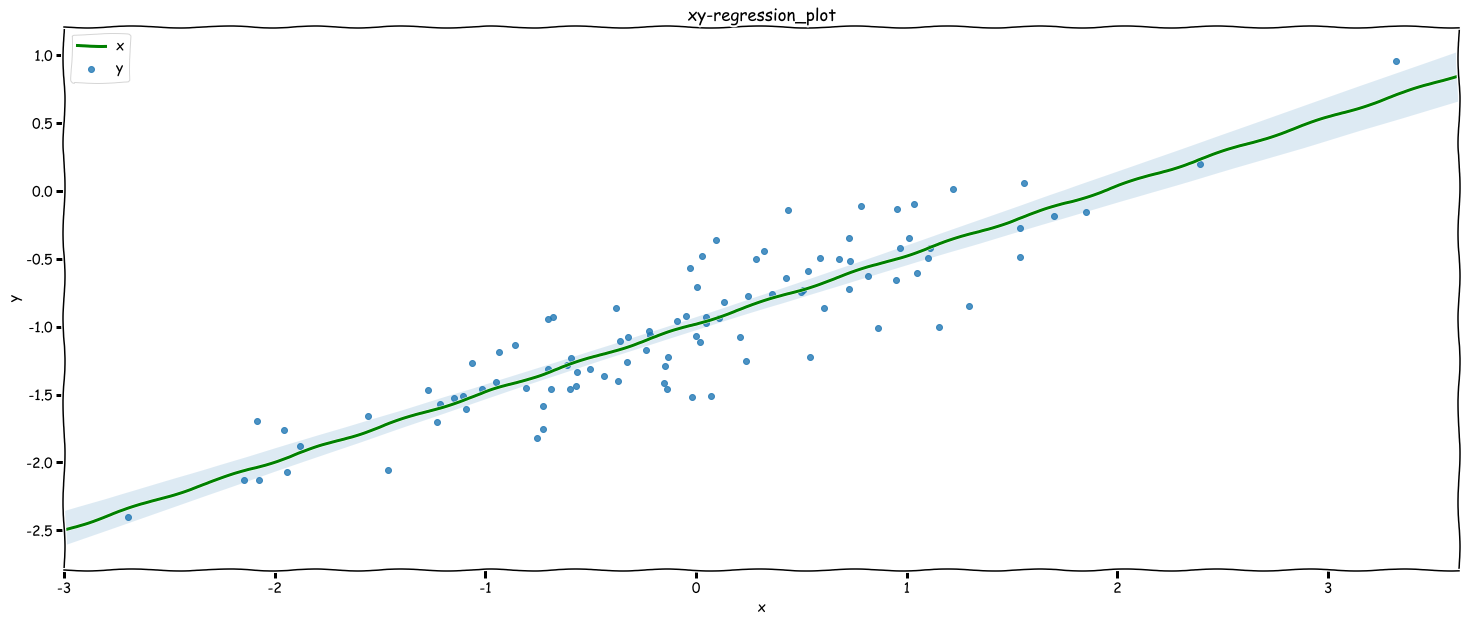

In [246]:
# 13.f. displaying the least squares line calculated in 13.d.
plt.figure(figsize = (25, 10))
reg_plot = sns.regplot(pd.Series(x), pd.Series(y), data = data)
regline = reg_plot.get_lines()[0]
regline.set_color('green')
plt.title("xy-regression_plot")
plt.xlabel("x")
plt.ylabel("y")
labels = ['x', 'y']
plt.legend(labels)

In [248]:
# 13.g. polynomial regression
reg_2 = ols("y~x+I(pow(x, 2))", data = data).fit()
f2 = np.poly1d(np.polyfit(x, y, 2))
print("y = ", f2)

y =            2
0.007677 x + 0.5064 x - 0.9866


In [249]:
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           3.21e-35
Time:                        22:28:22   Log-Likelihood:                -5.7710
No. Observations:                 100   AIC:                             17.54
Df Residuals:                      97   BIC:                             25.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9866      0.031    -31.954      0.000      -1.048      -0.925
x                0.5064      0.025     20.035      0.000       0.456       0.557
I(pow(x, 2))     0.0077      0.016      0.493      0.623      -0.023       0.039
==============================================================================
Omnibus:                        0.112   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.053
Skew:                          -0.054   Prob(JB):                        0.974
Kurtosis:                       2.964   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
RMSE_1 = np.sqrt(reg_1.mse_model) # root mean squared error of the first regression model
RMSE_2 = np.sqrt(reg_2.mse_model) # root mean squared error of the first regression model
print("RMSE_1:", RMSE_1) # this value in the range ~ 5.0
print("RMSE_2:", RMSE_2) # this value in the range of ~ 3.5

RMSE_1: 5.2161579839459815
RMSE_2: 3.6894985702008065


**There is not much to choose between the two models given their R^2. Given that
RMSE_2 is lower than RMSE_1 in general, this suggests the polynomial
model fits the data better. This is because it is able to fit the non-linear
nature of the true model better.**

In [251]:
# 13.h. regression after reducing variance
eps_r = eps/4 # the _r connotes "reduced"
y_r = -1 + (0.5*x) + eps_r

In [252]:
print("Variance of eps: ", eps.var())
print("Variance of eps_r: ", eps_r.var()) # confirms that the overall variance is reduced

Variance of eps:  0.06592262599904268
Variance of eps_r:  0.0041201641249401675


Text(0,0.5,'y_r')

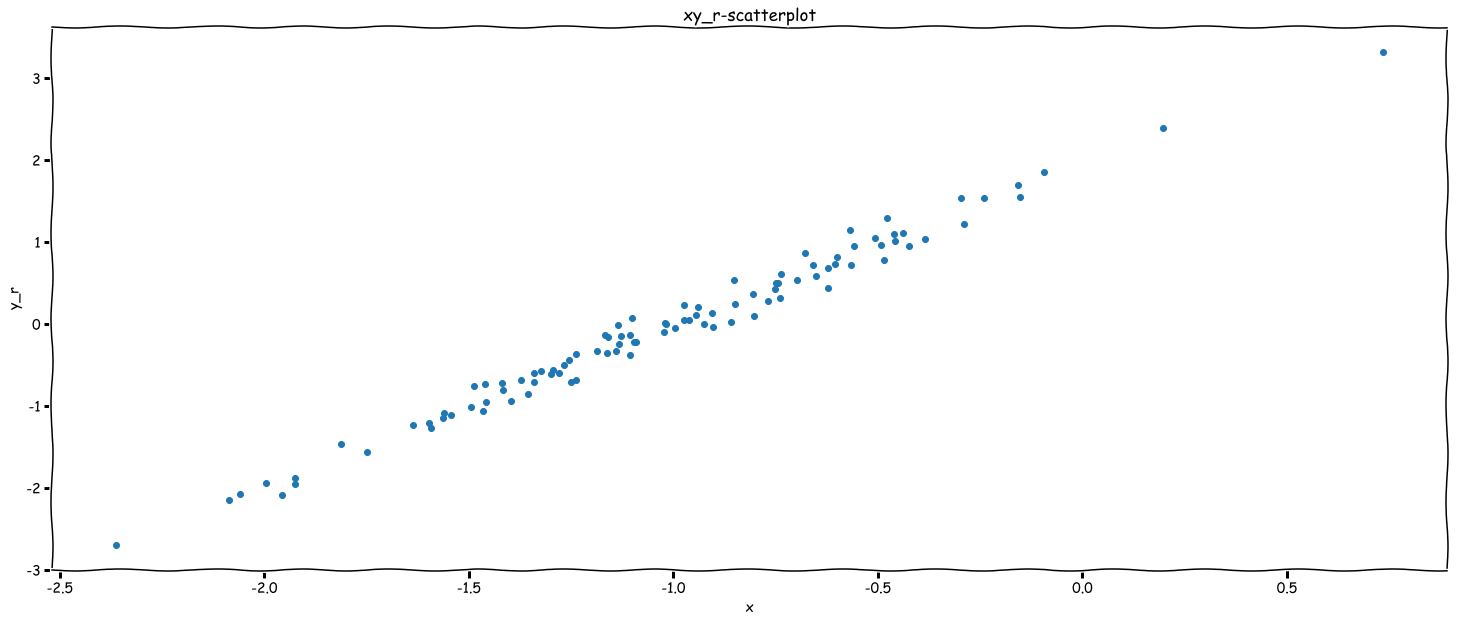

In [253]:
plt.figure(figsize = (25, 10))
plt.scatter(y_r, x)
plt.title("xy_r-scatterplot")
plt.xlabel("x")
plt.ylabel("y_r")

In [254]:
data_r = pd.concat([pd.DataFrame(x), pd.DataFrame(y_r)], axis = 1)
data.columns = ['x', 'y_r']
reg_r_1 = ols("y_r~x", data = data).fit()
f_r_1 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_r_1)

y =   
0.5065 x - 0.9784


In [255]:
reg_r_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_r   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     404.8
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.43e-36
Time:                        22:29:36   Log-Likelihood:                -5.8963
No. Observations:                 100   AIC:                             15.79
Df Residuals:                      98   BIC:                             21.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9784      0.026    -37.689      0.000      -1.030      -0.927
x              0.5065      0.025     20.118      0.000       0.457       0.556
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.128
Skew:                          -0.083   Prob(JB):                        0.938
Kurtosis:                       2.944   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
print("Beta_hat_r_0: %f" % reg_r_1.params[0])
print("Beta_hat_r_1: %f" % reg_r_1.params[1])

Beta_hat_r_0: -0.978413
Beta_hat_r_1: 0.506485


In [257]:
print("Difference in Beta_0: ", -1.0 - reg_r_1.params[0])
print("Difference in Beta_1: ", 0.5 - reg_r_1.params[1])

Difference in Beta_0:  -0.021586996369112876
Difference in Beta_1:  -0.006484960380478633


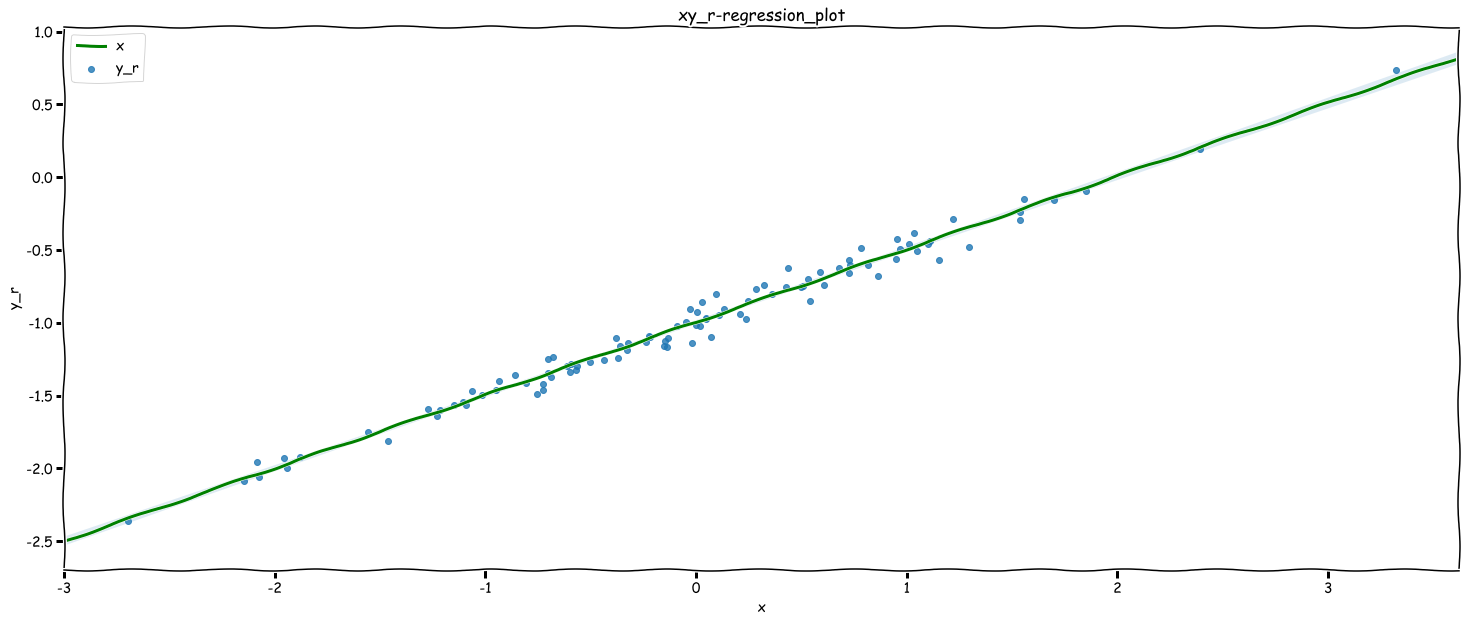

In [258]:
plt.figure(figsize = (25, 10))
reg_plot_r = sns.regplot(x, y_r, data = data_r)
regline_r = reg_plot_r.get_lines()[0]
regline_r.set_color('green')
plt.title("xy_r-regression_plot")
plt.xlabel("x")
plt.ylabel("y_r")
labels_r = ['x', 'y_r']
plt.legend(labels_r)

In [259]:
reg_r_2 = ols("y_r~x+I(pow(x, 2))", data = data_r).fit()
f_r_2 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_r_2)

y =   
0.5065 x - 0.9784


In [260]:
reg_r_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_r   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3152.
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           5.72e-89
Time:                        22:30:27   Log-Likelihood:                 132.86
No. Observations:                 100   AIC:                            -259.7
Df Residuals:                      97   BIC:                            -251.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9966      0.008   -129.120      0.000      -1.012      -0.981
x                0.5016      0.006     79.384      0.000       0.489       0.514
I(pow(x, 2))     0.0019      0.004      0.493      0.623      -0.006       0.010
==============================================================================
Omnibus:                        0.112   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.053
Skew:                          -0.054   Prob(JB):                        0.974
Kurtosis:                       2.964   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
RMSE_r_1 = np.sqrt(reg_r_1.mse_model) # root mean squared error of the first regression model
RMSE_r_2 = np.sqrt(reg_r_2.mse_model) # root mean squared error of the first regression model
print("RMSE_r_1:", RMSE_r_1) # this value in the range ~ 5.0
print("RMSE_r_2:", RMSE_r_2) # this value in the range of ~ 3.5

RMSE_r_1: 5.2161579839459815
RMSE_r_2: 3.6530321169394897


**Given that RMSE_r_2 is lower than RMSE_r_1 in general, this suggests the
polynomial model fits the data better. The R_2 of the polynomial model also
significantly larger than the first model. This suggests the polynomial model
better explains the reduced variation in data without compromising on the fit.**

In [263]:
# 13.i. regression after increasing the variance
eps_i = eps*4 # the _i connotes "increased"
y_i = -1 + (0.5*x) + eps_i

In [264]:
print("Sum of square of eps: ", eps.var())
print("Sum of square of eps_i: ",eps_i.var()) # confirms that the overall variance is reduced

Sum of square of eps:  0.06592262599904268
Sum of square of eps_i:  1.0547620159846829


Text(0,0.5,'y_i')

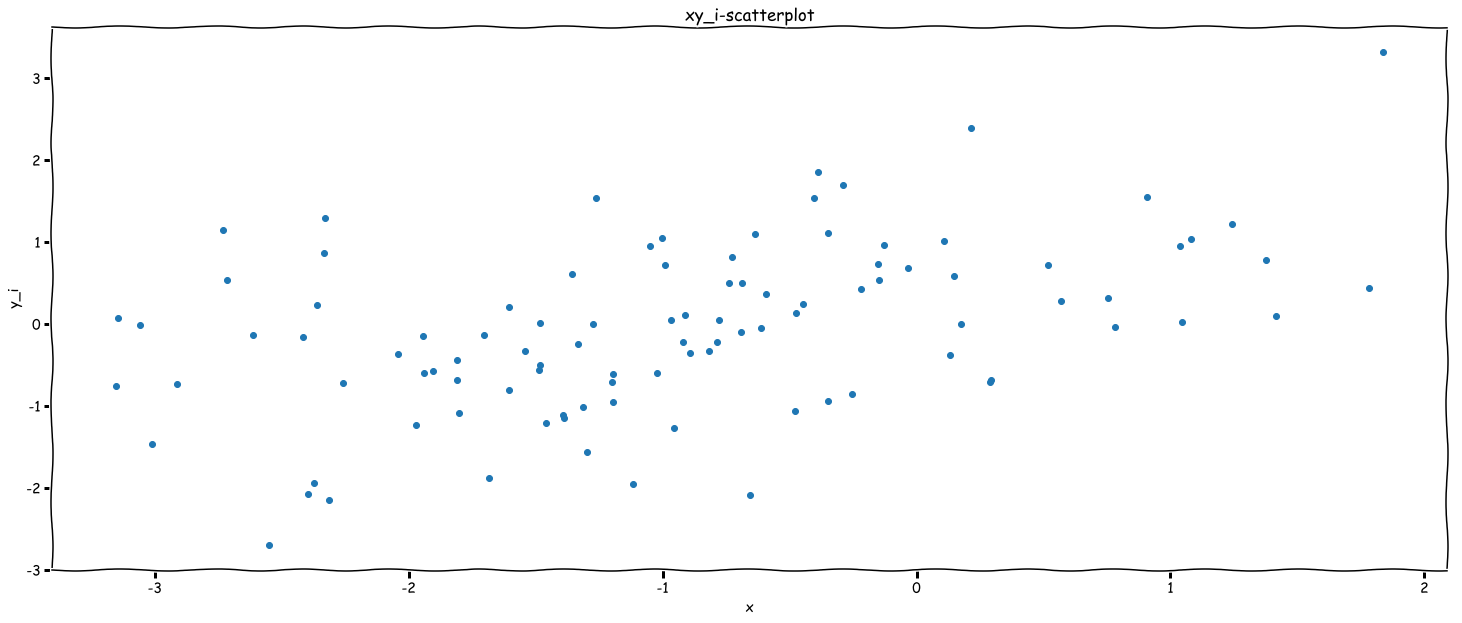

In [265]:
plt.figure(figsize = (25, 10))
plt.scatter(y_i, x)
plt.title("xy_i-scatterplot")
plt.xlabel("x")
plt.ylabel("y_i")

In [266]:
data_i = pd.concat([pd.DataFrame(x), pd.DataFrame(y_i)], axis = 1)
data.columns = ['x', 'y_i']
reg_i_1 = ols("y_i~x", data = data).fit()
f_i_1 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_i_1)

y =   
0.5065 x - 0.9784


In [267]:
reg_i_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_i   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     404.8
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.43e-36
Time:                        22:31:56   Log-Likelihood:                -5.8963
No. Observations:                 100   AIC:                             15.79
Df Residuals:                      98   BIC:                             21.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9784      0.026    -37.689      0.000      -1.030      -0.927
x              0.5065      0.025     20.118      0.000       0.457       0.556
==============================================================================
Omnibus:                        0.169   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.128
Skew:                          -0.083   Prob(JB):                        0.938
Kurtosis:                       2.944   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
print("Beta_hat_i_0: %f" % reg_i_1.params[0])
print("Beta_hata_i_1: %f" % reg_i_1.params[1])

Beta_hat_i_0: -0.978413
Beta_hata_i_1: 0.506485


In [269]:
print("Difference in Beta_0: ", -1.0 - reg_i_1.params[0])
print("Difference in Beta_1: ", 0.5 - reg_i_1.params[1])

Difference in Beta_0:  -0.021586996369112876
Difference in Beta_1:  -0.006484960380478633


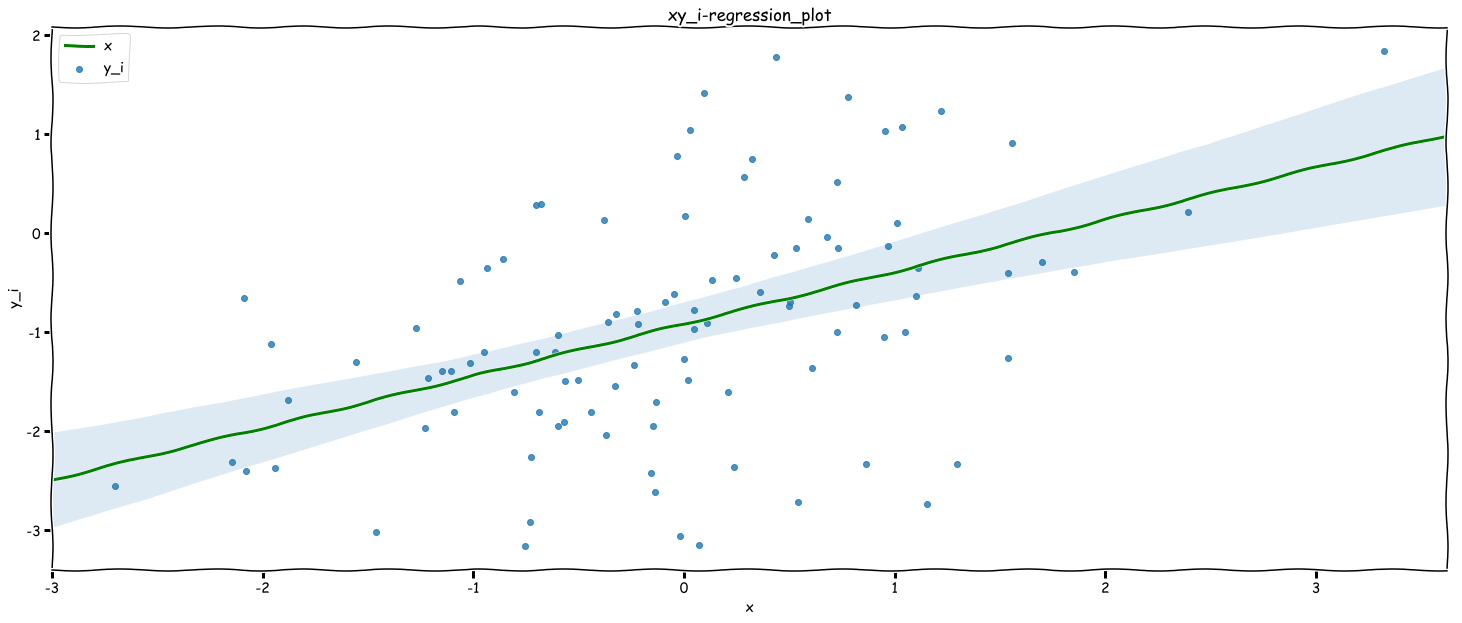

In [271]:
plt.figure(figsize = (25, 10))
reg_plot_i = sns.regplot(x, y_i, data = data_i)
regline_i = reg_plot_i.get_lines()[0]
regline_i.set_color('green')
plt.title("xy_i-regression_plot")
plt.xlabel("x")
plt.ylabel("y_i")
labels_i = ['x', 'y_i']
plt.legend(labels_i)

In [272]:
reg_i_2 = ols("y_i~x+I(pow(x, 2))", data = data_i).fit()
f_i_2 = np.poly1d(np.polyfit(x, y, 1))
print("y = ", f_i_2)

y =   
0.5065 x - 0.9784


In [273]:
reg_i_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_i   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     13.66
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           5.95e-06
Time:                        22:33:37   Log-Likelihood:                -144.40
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9463      0.124     -7.663      0.000      -1.191      -0.701
x                0.5254      0.101      5.197      0.000       0.325       0.726
I(pow(x, 2))     0.0307      0.062      0.493      0.623      -0.093       0.154
==============================================================================
Omnibus:                        0.112   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.053
Skew:                          -0.054   Prob(JB):                        0.974
Kurtosis:                       2.964   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
RMSE_i_1 = np.sqrt(reg_i_1.mse_model) # root mean squared error of the first regression model
RMSE_i_2 = np.sqrt(reg_i_2.mse_model) # root mean squared error of the first regression model
print("RMSE_i_1:", RMSE_i_1) # this value in the range ~ 5.0
print("RMSE_i_2:", RMSE_i_2) # this value in the range of ~ 3.5

RMSE_i_1: 5.2161579839459815
RMSE_i_2: 3.8472457903559434


**Given that RMSE_r_2 is lower than RMSE_r_1 in general, this suggests the
polynomial model fits the data better. However, the R^2 of the second model is
significantly lower than the first model, which suggests that the polynomial
model starts to follow the noise thereby showing increased variance.**

In [276]:
# 13.j. confidence intervals
confint1 = pd.DataFrame(reg_1.conf_int(alpha = 0.05)).T
confint2 = pd.DataFrame(reg_2.conf_int(alpha = 0.05)).T
confint_r_1 = pd.DataFrame(reg_r_1.conf_int(alpha = 0.05)).T
confint_r_2 = pd.DataFrame(reg_r_2.conf_int(alpha = 0.05)).T
confint_i_1 = pd.DataFrame(reg_i_1.conf_int(alpha = 0.05)).T
confint_i_2 = pd.DataFrame(reg_i_2.conf_int(alpha = 0.05)).T

In [280]:
print("95% C.I. of Linear Model:\n")
confint1

95% C.I. of Linear Model:



,Intercept,x
0,-1.029929,0.456526
1,-0.926897,0.556444


In [281]:
print("95% C.I. of Polynomial Model:\n")
confint2

95% C.I. of Polynomial Model:



,Intercept,x,"I(pow(x, 2))"
0,-1.047861,0.456200,-0.023202
1,-0.925304,0.556525,0.038557


In [282]:
print("95% C.I. of Linear Model with reduced variance:\n")
confint_r_1

95% C.I. of Linear Model with reduced variance:



,Intercept,x
0,-1.029929,0.456526
1,-0.926897,0.556444


In [283]:
print("95% C.I. of Polynomial Model with reduced variance:\n")
confint_r_2

95% C.I. of Polynomial Model with reduced variance:



,Intercept,x,"I(pow(x, 2))"
0,-1.011965,0.489050,-0.005801
1,-0.981326,0.514131,0.009639


In [284]:
print("95% C.I. of Polynomial Model with reduced variance:\n")
confint_r_1

95% C.I. of Polynomial Model with reduced variance:



,Intercept,x
0,-1.029929,0.456526
1,-0.926897,0.556444


In [285]:
print("95% C.I. of Polynomial Model with increased variance:\n")
confint_r_2

95% C.I. of Polynomial Model with increased variance:



,Intercept,x,"I(pow(x, 2))"
0,-1.011965,0.489050,-0.005801
1,-0.981326,0.514131,0.009639
